In [47]:
#import the necessary functions for the program
from urllib.request import urlretrieve
import pandas as pd
import datetime

In [68]:
#defines a function to load in the data, fix the datetimes and set this as the new index
def clean_data(URL):
    urlretrieve(URL,'file')
    data = pd.read_csv('file',skiprows=4)
    data['time'] = data['time'].replace({'24:00':'00:00'})
    data['Datetime'] = pd.to_datetime(data['Date'] + ' ' + data['time'],dayfirst=True)
    for x in data.index:
        if data.iloc[x]['Datetime'].strftime("%H:%M") == "00:00":
            y = data.iloc[x]['Datetime'] + datetime.timedelta(days=1)
            data.at[x,'Datetime'] = y
    data.set_index('Datetime', inplace=True)
    return data


In [76]:
#create datasets for each of the four available years
data_2020 = clean_data('https://uk-air.defra.gov.uk/data_files/site_data/REA5_2020.csv')
data_2019 = clean_data('https://uk-air.defra.gov.uk/data_files/site_data/REA5_2019.csv')
data_2018 = clean_data('https://uk-air.defra.gov.uk/data_files/site_data/REA5_2018.csv')
data_2017 = clean_data('https://uk-air.defra.gov.uk/data_files/site_data/REA5_2017.csv')

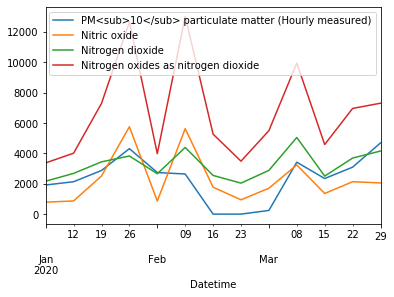

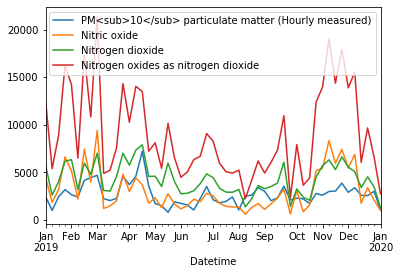

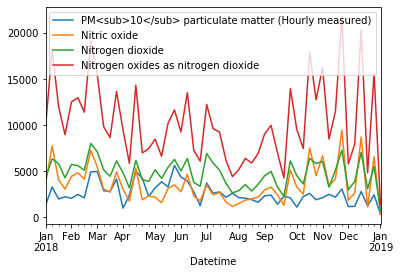

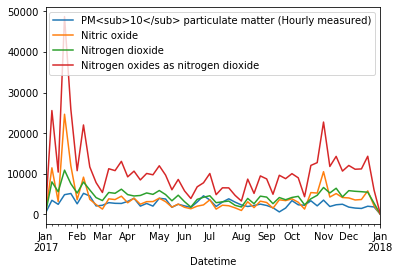

In [75]:
#plot a weekly version of each of the datasets
data_2020.resample('W').sum().plot()
data_2019.resample('W').sum().plot()
data_2018.resample('W').sum().plot()
data_2017.resample('W').sum().plot()